In [65]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import theano
from numpy import genfromtxt

ImportError: cannot import name 'RNN'

In [5]:
%matplotlib inline
import math
from sklearn.metrics import mean_squared_error

In [6]:
my_data = pd.read_csv('slot_series.csv')

In [7]:
time_series_data = {}

In [8]:
for i in my_data.slots.unique():
    time_series_data[i] = my_data[my_data.slots==i]

In [9]:
my_data.slots.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

In [10]:
for i in my_data.slots.unique():
    print(time_series_data[i].shape)

(255, 13)
(409, 13)
(385, 13)
(392, 13)
(379, 13)
(351, 13)
(374, 13)
(414, 13)
(390, 13)
(421, 13)
(288, 13)
(525, 13)


In [11]:
my_data.slots.value_counts()

1     525
11    421
9     414
3     409
5     392
10    390
4     385
6     379
8     374
7     351
12    288
2     255
Name: slots, dtype: int64

In [16]:
ts1=time_series_data[11][['Date','slots','impressions']]

In [17]:
TS1=ts1.groupby('Date').mean().reset_index()

In [18]:
TS1['Date']=pd.to_datetime(TS1['Date'], format='%m/%d/%Y')

In [19]:
TS1.head()

,Date,slots,impressions
0,2016-01-01,11,2.49
1,2016-01-10,11,10.55
2,2016-01-11,11,38.40
3,2016-01-12,11,3.58
4,2016-01-13,11,3.12


In [20]:
 TS1=TS1.sort('Date')

C:\Users\Lighthouse\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [21]:
TS1.head()

,Date,slots,impressions
32,2015-10-10,11,11.83
34,2015-10-11,11,1.33
36,2015-10-12,11,2.59
38,2015-10-13,11,26.93
40,2015-10-14,11,11.42


In [22]:
ts2=TS1[TS1.Date<='2016-10-17']

In [23]:
train_size=len(ts2[ts2.Date<='2016-09-12'])
test_size=len(ts2[ts2.Date>'2016-09-12'])

In [25]:
ts_data=ts2.impressions
ts_data=ts_data[:,None]

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
ts_data =  scaler.fit_transform(ts_data)

In [27]:
train1=ts_data[0:train_size]

In [28]:
test1=ts_data[train_size:train_size+test_size]

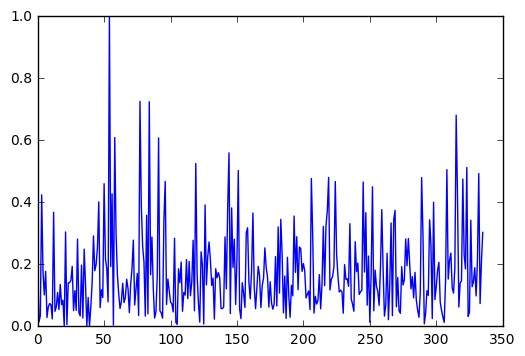

In [29]:
plt.plot(train1)

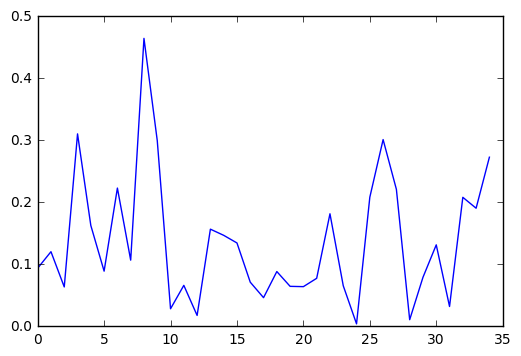

In [30]:
plt.plot(test1)

In [31]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
look_back=50
trainX, trainY = create_dataset(train1, look_back)

In [34]:
trainX.shape

(286, 50)

In [36]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))


In [37]:
trainX.shape

(286, 50, 1)

In [66]:
%%time
theano.config.compute_test_value = "ignore"
# create and fit the LSTM network
batch_size = 128
model = Sequential()
model.add(LSTM(input_dim=1,output_dim=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(trainX, trainY, nb_epoch=100, batch_size=batch_size, verbose=2)

Epoch 1/100
3s - loss: 0.3458
Epoch 2/100
1s - loss: 0.0436
Epoch 3/100
1s - loss: 0.0372
Epoch 4/100
1s - loss: 0.0343
Epoch 5/100
1s - loss: 0.0387
Epoch 6/100
1s - loss: 0.0345
Epoch 7/100
1s - loss: 0.0274
Epoch 8/100
1s - loss: 0.0250
Epoch 9/100
1s - loss: 0.0257
Epoch 10/100
1s - loss: 0.0251
Epoch 11/100
1s - loss: 0.0437
Epoch 12/100
1s - loss: 0.0400
Epoch 13/100
1s - loss: 0.0322
Epoch 14/100
1s - loss: 0.0296
Epoch 15/100
1s - loss: 0.0271
Epoch 16/100
1s - loss: 0.0250
Epoch 17/100
1s - loss: 0.0241
Epoch 18/100
1s - loss: 0.0239
Epoch 19/100
1s - loss: 0.0239
Epoch 20/100
1s - loss: 0.0349
Epoch 21/100
1s - loss: 0.0955
Epoch 22/100
1s - loss: 0.0276
Epoch 23/100
1s - loss: 0.0312
Epoch 24/100
1s - loss: 0.0266
Epoch 25/100
1s - loss: 0.0240
Epoch 26/100
1s - loss: 0.0245
Epoch 27/100
1s - loss: 0.0343
Epoch 28/100
1s - loss: 0.0313
Epoch 29/100
1s - loss: 0.0252
Epoch 30/100
1s - loss: 0.0278
Epoch 31/100
1s - loss: 0.0282
Epoch 32/100
1s - loss: 0.0219
Epoch 33/100
1s -

In [67]:
look_ahead = test_size
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

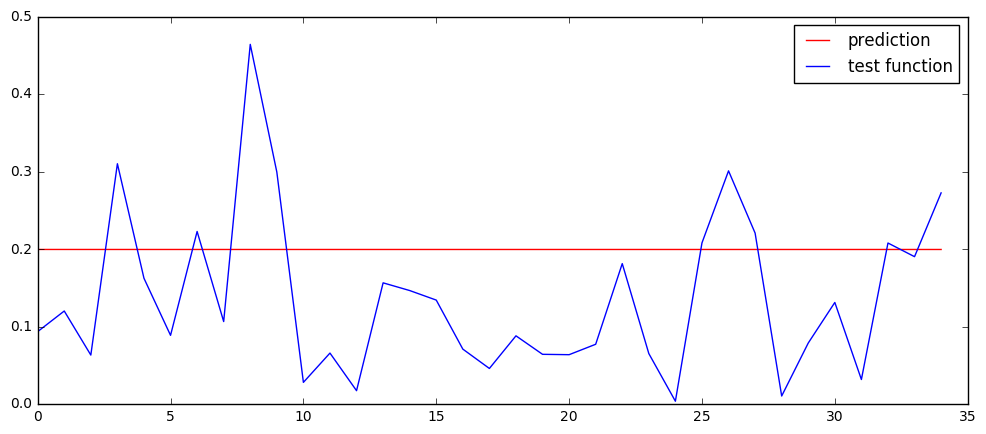

In [68]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),ts_data[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

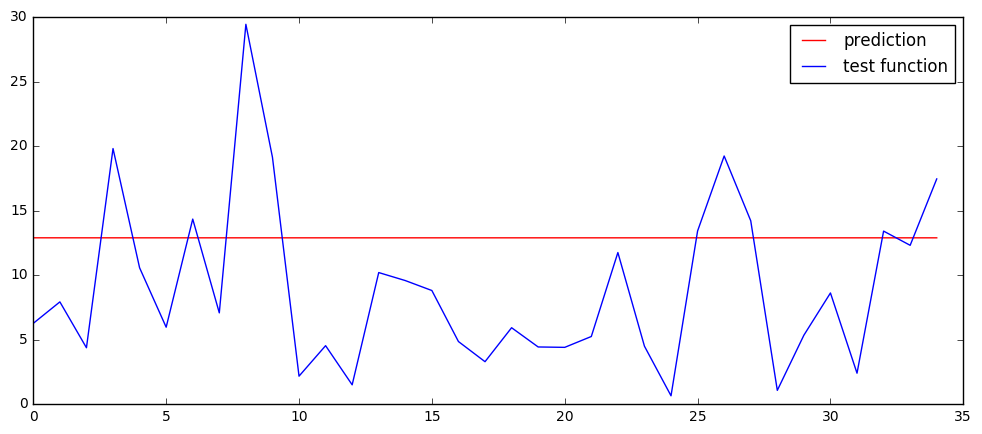

In [69]:
Predict_1 = scaler.inverse_transform(predictions)
test_1 = scaler.inverse_transform(ts_data[train_size:(train_size+look_ahead)])

plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),Predict_1,'r',label="prediction")
plt.plot(np.arange(look_ahead),test_1,label="test function")
plt.legend()
plt.show()

In [70]:
testScore = math.sqrt(mean_squared_error(test_1, Predict_1))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 7.47 RMSE


In [71]:
np.mean(np.abs((test_1.ravel() - Predict_1.ravel()) / test_1.ravel())) * 100

204.30145845920285